In [1]:
%pip install pandas
%pip install nbconvert

In [10]:
import pandas as pd
import math
import matplotlib.pyplot as plt

oCelsiusValhalla = pd.read_csv('/content/Valhalla23.csv')

test = oCelsiusValhalla.sample(frac=0.3, axis=0)
oCelsiusValhalla = oCelsiusValhalla.drop(index=test.index)


# Crear lista con los hiper-parámetros iniciales (thetas)
iN = len(oCelsiusValhalla)
fTeta0 = 5
fTeta1 = 1
# Cargar el valor del learning rate (alpha)
fAlpha = 0.0005
fValorBuscado = 61.47200 # -139.7400

oCelsiusValhalla.index = range(len(oCelsiusValhalla))
#print(oCelsiusValhalla)
#print(oCelsiusValhalla.to_string())

In [26]:
fTeta0 = -5
fTeta1 = 1
iContador = 0

while iContador < 1000:

  # Crear función lambda para la función de hipótesis
  oH0Lambda = lambda teta0, teta1, x: teta0 + (teta1 * x)
  # Calcular el total de muestras a partir de los datos (n)
  oH0 = []
  iH0Total = 0
  for x in oCelsiusValhalla["Celsius"]: oH0.append( oH0Lambda(fTeta0, fTeta1, x) )
  iH0Total = sum(oH0)


  # Calcular delta para theta0 y para cada muestra
  oDelta = []
  iDeltaTotal = 0
  i = 0
  while(i < iN):
    oDelta.append( oH0[i] - oCelsiusValhalla["Valks"][i]  )
    i += 1
  iDeltaTotal = sum(oDelta)


  # Calcular delta para theta1 y para cada muestra

  oDeltaX = []
  iDeltaXTotal = 0
  i = 0
  while(i < iN):
    oDeltaX.append( oDelta[i] * oCelsiusValhalla["Celsius"][i]  )
    i += 1

  iDeltaXTotal = sum(oDeltaX)


  # Actualizar theta0
  fTeta0 = fTeta0 - (fAlpha * ((1/iN) * iDeltaTotal) )

  # Actualizar theta1
  fTeta1 = fTeta1 - (fAlpha * ((1/iN) * iDeltaXTotal) )

  iContador += 1
#fYm = 0
#fYm = fTeta0 + fTeta1 * fValorBuscado
#print("Estimacion Ym: " + str(fYm))

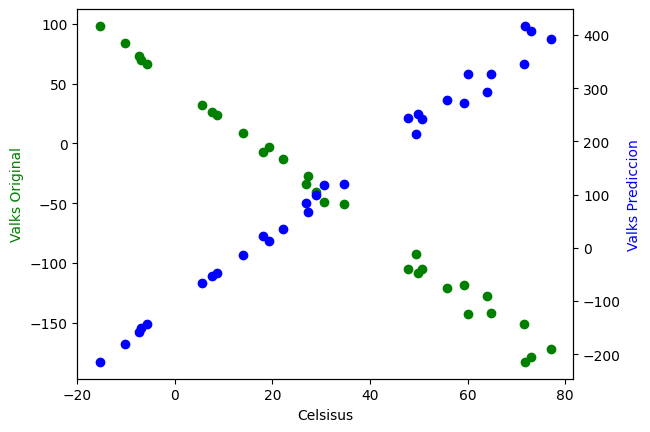

In [27]:
oYPrediccion = []
for y in test["Valks"]:
  fYm = 0
  fYm = fTeta0 + fTeta1 * y
  oYPrediccion.append(fYm)
fig, ax1 = plt.subplots()

#print("Original: ", test["Valks"], " Prediccion", oYPrediccion)

ax2 = ax1.twinx()
ax1.plot(test["Celsius"], test["Valks"], 'o', color="g")
ax2.plot(test["Celsius"], oYPrediccion, 'o', color="b")

ax1.set_xlabel('Celsisus')
ax1.set_ylabel('Valks Original', color='g')
ax2.set_ylabel('Valks Prediccion', color='b')

plt.show()

In [ ]:
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")


Saving Challenge_A00835194.ipynb to Challenge_A00835194.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>